In [15]:
import gym
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import random

In [13]:
"Tensorflow Version: ", tf.__version__, "Keras Version: ", tf.keras.__version__

('Tensorflow Version: ', '2.18.0', 'Keras Version: ', '3.8.0')

In [14]:
env = gym.make('CartPole-v1')
"Action Space: ", env.action_space, "Observation Space: ", env.observation_space

('Action Space: ',
 Discrete(2),
 'Observation Space: ',
 Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(24, input_shape=(4,), activation='relu'),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(2, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

/Users/aydelottec/Desktop/CodingProjects/NeuralNetworks/Cart-Pole/.venv/lib/python3.12/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  
/Users/aydelottec/Desktop/CodingProjects/NeuralNetworks/Cart-Pole/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-19 09:59:23.785 Python[89313:10241516] +[IMKClient subclass]: chose IMKClient_Legacy
2025-02-19 09:59:23.785 Python[89313:10241516] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


TypeError: Image data of dtype object cannot be converted to float

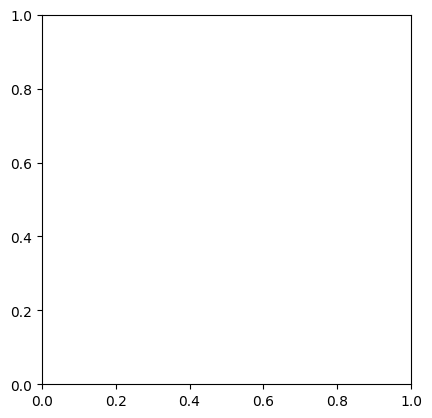

In [20]:
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

### Prepare environment
env = gym.make('CartPole-v0', render_mode='rgb_array')

### Make model
model = Sequential()
model.add(Dense(128, input_shape=(env.observation_space.shape[0],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))
model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])

### Train model
def train_model(n_episodes=500, epsilon=0.5, decay_factor=0.999, gamma=0.95, visualize=False):
    G_array = []
    for episode in range(n_episodes):
        observation = env.reset()[0]
        observation = observation.reshape(-1, env.observation_space.shape[0])
        epsilon *= decay_factor
        G = 0
        done = False
        while not done:
            if visualize:
                frame = env.render()  # Render without mode argument
                plt.imshow(frame)
                plt.axis('off')
                plt.pause(0.01)  # Pause to update the plot
                plt.clf()  # Clear the current figure
            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(model.predict(observation))
            new_observation, reward, done, _, _ = env.step(action)
            new_observation = new_observation.reshape(-1, env.observation_space.shape[0])
            target = reward + gamma * np.max(model.predict(new_observation))
            target_vector = model.predict(observation)[0]
            target_vector[action] = target
            model.fit(observation, target_vector.reshape(-1, env.action_space.n), epochs=1, verbose=0)
            observation = new_observation
            G += reward
        G_array.append(G)
        print(f"Episode: {episode + 1}, Total Reward: {G}, Epsilon: {epsilon}")

    return G_array

# Train the model with visualization
G_array = train_model(visualize=True)

# Plot the rewards over episodes
plt.plot(G_array)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards Over Episodes')
plt.show()

# Close the environment
env.close()